In [1]:
%load_ext autoreload
%autoreload 2
import torch
import numpy as np
import pandas as pd
from omegaconf import OmegaConf
from pathlib import Path
from pprint import pprint
# plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
# mycode
from repo import REPO
from ml_utilities.output_loader.result_loader import SweepResult, JobResult
from ml_utilities.output_loader import create_job_output_loader
from ml_utilities.output_loader.plot import plot_sweep_summary, plot_data_log_values
from tflearning.mode_connectivity.instability_analysis import InstabilityAnalyzer
from tflearning.mode_connectivity.plot import plot_barriers, plot_instability, plot_distances
from tflearning.learning_dynamics.covariance_analysis import GradCovarianceAnalyzer
from tflearning.learning_dynamics.plot import plot_covariance_statistics

# 15.11 Resnet MNIST Linear mode connectivity

Reference: Frankle, Jonathan, Gintare Karolina Dziugaite, Daniel M. Roy, and Michael Carbin. 2020. “Linear Mode Connectivity and the Lottery Ticket Hypothesis.” arXiv. http://arxiv.org/abs/1912.05671.


**RERUN 15**: In Experiment 15.2 we saw that the lenet network architecture is instable early on in training when used with CIFAR10. Now we want to confirm, that it is not architecture, but data dependent by using a resnet architecture for MNIST. 
We expect that in this case there should also be no barrier present. 

Starting point of other investigation:
On MNIST the Lenet architecture is stable already at initialization. 
With this experiment we want to investigate whether this is due to the simple dataset (MNIST) or due to the small architecture. Therefore we rerun the same experiment on CIFAR10 with a larger input layer.


## BN update OFF

In [2]:
spec = 'mnist-resnet-bnUpdateOff'
path = '/system/user/beck/pwbeck/projects/regularization/tflearning/outputs/IA-B-mnist-15.11.0-resnet--230124_164715'
insta = InstabilityAnalyzer.reload(sweep_result_dir=path, instability_folder_suffix='')

In [3]:
# load training jobs
sweepr = insta.instability_sweep
mainjob = insta.main_training_job

In [4]:
mainjob.all_log_columns

{'val': ['log_step', 'loss', 'Accuracy', 'epoch', 'train_step'],
 'train_step': ['log_step',
  'loss',
  'lr',
  'Accuracy',
  'weight_norm',
  'grad_norm',
  'epoch',
  'train_step'],
 'train': ['log_step', 'loss', 'lr', 'Accuracy', 'epoch', 'train_step'],
 'timer': ['log_step',
  'T_val_epoch',
  'epoch',
  'train_step',
  'T_train_step',
  'T_train_epoch']}

In [5]:
mainjob.get_summary(log_source='val', col_sel='Accuracy')

,best_train_step,best_val_score,Accuracy-train_step-10000,seed
IA-A-mnist-15.11.0-resnet--230124_163846,10000,0.993667,0.993667,0


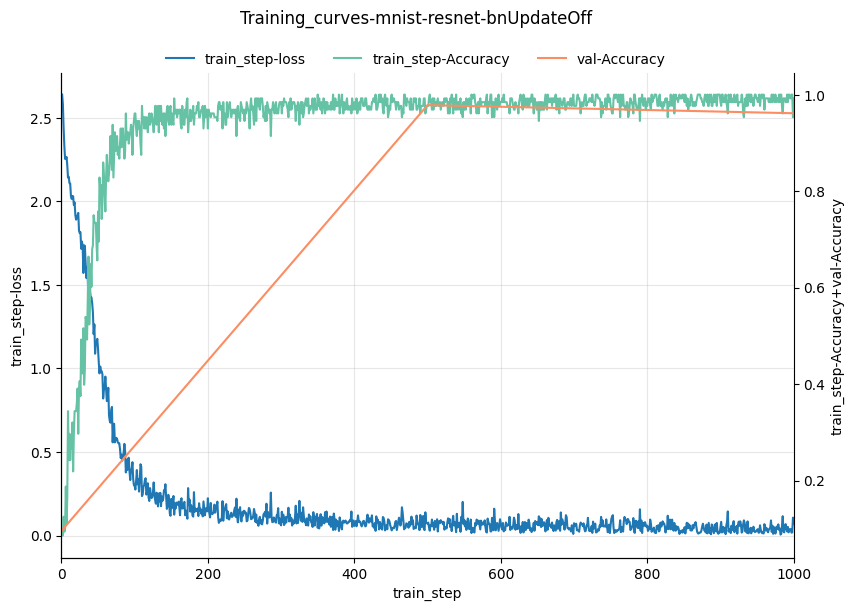

In [6]:
mj_dl = mainjob.get_data_log(['train_step', 'val'])
f = plot_data_log_values(mj_dl, y_axis_left=['train_step-loss'], y_axis_right=['train_step-Accuracy', 'val-Accuracy'], xlim=(0, 1000), x_axis='train_step', title=f'Training_curves-{spec}', savefig=True)

In [8]:
sweepr.get_summary()

,best_train_step,best_val_score,trainer.resume_training.checkpoint_idx,seed
IA-B-mnist-15.11.0-resnet--checkpoint_idx-0-seed-1--230124_164741,13500,0.993333,0,1
IA-B-mnist-15.11.0-resnet--checkpoint_idx-100-seed-1--230124_164741,9000,0.993833,100,1
IA-B-mnist-15.11.0-resnet--checkpoint_idx-1000-seed-1--230124_164737,18500,0.993833,1000,1
IA-B-mnist-15.11.0-resnet--checkpoint_idx-10000-seed-1--230124_164732,15000,0.993833,10000,1
IA-B-mnist-15.11.0-resnet--checkpoint_idx-15000-seed-1--230124_165536,24000,0.993333,15000,1
IA-B-mnist-15.11.0-resnet--checkpoint_idx-2000-seed-1--230124_165819,9000,0.994000,2000,1
IA-B-mnist-15.11.0-resnet--checkpoint_idx-250-seed-1--230124_164739,4500,0.993333,250,1
IA-B-mnist-15.11.0-resnet--checkpoint_idx-50-seed-1--230124_164735,16500,0.993167,50,1
IA-B-mnist-15.11.0-resnet--checkpoint_idx-500-seed-1--230124_164740,21000,0.993667,500,1
IA-B-mnist-15.11.0-resnet--checkpoint_idx-5000-seed-1--230124_164729,5500,0.993500,5000,1


In [9]:
df = insta.combined_results_dfs['datasets'].loc['default_params']
df

datasets                                                                                                val  \
score                                                                                  interpolation_scores   
alpha                                                                                                  -0.1   
init_model_idx_k job                                             seeds  model_idxes                           
0                IA-B-mnist-15.11.0-resnet--checkpoint_idx-0     (1, 0) (13500, 10000)             0.007694   
                                                                        (24001, 24001)             0.007860   
50               IA-B-mnist-15.11.0-resnet--checkpoint_idx-50    (1, 0) (16500, 10000)             0.007195   
                                                                        (24000, 24001)             0.007029   
100              IA-B-mnist-15.11.0-resnet--checkpoint_idx-100   (1, 0) (9000, 10000)              0.006839   
                                                                        (24000, 24001)             0.006506   
250              IA-B-mnist-15.11.0-resnet--checkpoint_idx-250   (1, 0) (4500, 10000)              0.008002   
                                                                        (24000, 24001)             0.007836   
500              IA-B-mnist-15.11.0-resnet--checkpoint_idx-500   (1, 0) (21000, 10000)             0.006839   
                                                                        (24000, 24001)             0.007171   
1000             IA-B-mnist-15.11.0-resnet--checkpoint_idx-1000  (1, 0) (18500, 10000)             0.006673   
                                                                        (24000, 24001)             0.007005   
2000             IA-B-mnist-15.11.0-resnet--checkpoint_idx-2000  (1, 0) (9000, 10000)              0.005675   
                                                                        (24000, 24001)             0.006839   
5000             IA-B-mnist-15.11.0-resnet--checkpoint_idx-5000  (1, 0) (5500, 10000)              0.006839   
                                                                        (24000, 24001)             0.006839   
10000            IA-B-mnist-15.11.0-resnet--checkpoint_idx-10000 (1, 0) (15000, 10000)             0.006340   
                                                                        (24000, 24001)             0.006839   
15000            IA-B-mnist-15.11.0-resnet--checkpoint_idx-15000 (1, 0) (24000, 10000)             0.007005   
                                                                        (24000, 24001)             0.006673   

datasets                                                                                          \
score                                                                                              
alpha                                                                                        0.0   
init_model_idx_k job                                             seeds  model_idxes                
0                IA-B-mnist-15.11.0-resnet--checkpoint_idx-0     (1, 0) (13500, 10000)  0.007171   
                                                                        (24001, 24001)  0.007171   
50               IA-B-mnist-15.11.0-resnet--checkpoint_idx-50    (1, 0) (16500, 10000)  0.007528   
                                                                        (24000, 24001)  0.007528   
100              IA-B-mnist-15.11.0-resnet--checkpoint_idx-100   (1, 0) (9000, 10000)   0.006174   
                                                                        (24000, 24001)  0.006506   
250              IA-B-mnist-15.11.0-resnet--checkpoint_idx-250   (1, 0) (4500, 10000)   0.007504   
                                                                        (24000, 24001)  0.007504   
500              IA-B-mnist-15.11.0-resnet--checkpoint_idx-500   (1, 0) (21000, 10000)  0.006839   
                                   

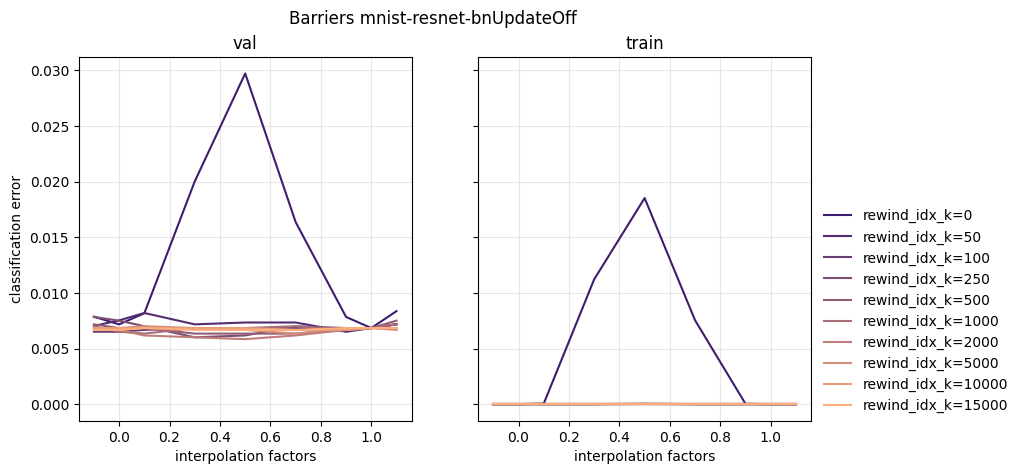

In [10]:
f = plot_barriers(instability_df=insta.combined_results_dfs['datasets'].loc['default_params'], title=f'Barriers {spec}', save_format='png')

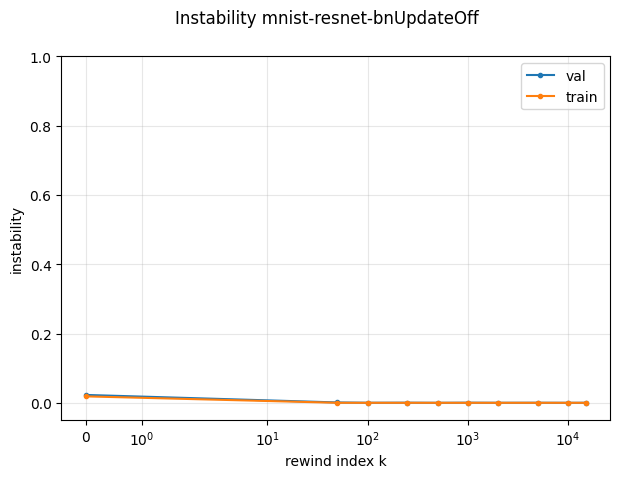

In [11]:
f = plot_instability(instability_df=insta.combined_results_dfs['datasets'].loc['default_params'], title=f'Instability {spec}', x_scale='symlog', save_format='png')

In [12]:
df = insta.combined_results_dfs['distances'].loc['default_params']
df

distances                                                                              l2distance  \
init_model_idx_k job                                             seeds  model_idxes                 
0                IA-B-mnist-15.11.0-resnet--checkpoint_idx-0     (1, 0) (13500, 10000)   6.948958   
                                                                        (24001, 24001)   6.982873   
50               IA-B-mnist-15.11.0-resnet--checkpoint_idx-50    (1, 0) (16500, 10000)   3.990982   
                                                                        (24000, 24001)   4.014075   
100              IA-B-mnist-15.11.0-resnet--checkpoint_idx-100   (1, 0) (9000, 10000)    3.537391   
                                                                        (24000, 24001)   3.608372   
250              IA-B-mnist-15.11.0-resnet--checkpoint_idx-250   (1, 0) (4500, 10000)    3.182853   
                                                                        (24000, 24001)   3.198940   
500              IA-B-mnist-15.11.0-resnet--checkpoint_idx-500   (1, 0) (21000, 10000)   2.748499   
                                                                        (24000, 24001)   2.762471   
1000             IA-B-mnist-15.11.0-resnet--checkpoint_idx-1000  (1, 0) (18500, 10000)   2.281593   
                                                                        (24000, 24001)   2.291177   
2000             IA-B-mnist-15.11.0-resnet--checkpoint_idx-2000  (1, 0) (9000, 10000)    1.767471   
                                                                        (24000, 24001)   1.778059   
5000             IA-B-mnist-15.11.0-resnet--checkpoint_idx-5000  (1, 0) (5500, 10000)    0.993289   
                                                                        (24000, 24001)   0.955286   
10000            IA-B-mnist-15.11.0-resnet--checkpoint_idx-10000 (1, 0) (15000, 10000)   0.337505   
                                                                        (24000, 24001)   0.280313   
15000            IA-B-mnist-15.11.0-resnet--checkpoint_idx-15000 (1, 0) (24000, 10000)   0.296724   
                                                                        (24000, 24001)   0.027482   

distances                                                                              cosinesimilarity  
init_model_idx_k job                                             seeds  model_idxes                      
0                IA-B-mnist-15.11.0-resnet--checkpoint_idx-0     (1, 0) (13500, 10000)         0.987717  
                                                                        (24001, 24001)         0.987604  
50               IA-B-mnist-15.11.0-resnet--checkpoint_idx-50    (1, 0) (16500, 10000)         0.995944  
                                                                        (24000, 24001)         0.995899  
100              IA-B-mnist-15.11.0-resnet--checkpoint_idx-100   (1, 0) (9000, 10000)          0.996811  
                                                                        (24000, 24001)         0.996687  
250              IA-B-mnist-15.11.0-resnet--checkpoint_idx-250   (1, 0) (4500, 10000)          0.997422  
                                                                        (24000, 24001)         0.997397  
500              IA-B-mnist-15.11.0-resnet--checkpoint_idx-500   (1, 0) (21000, 10000)         0.998077  
                                                                        (24000, 24001)         0.998058  
1000             IA-B-mnist-15.11.0-resnet--checkpoint_idx-1000  (1, 0) (18500, 10000)         0.998674  
                                                                        (24000, 24001)         0.998664  
2000             IA-B-mnist-15.11.0-resnet--checkpoint_idx-2000  (1, 0) (9000, 10000)          0.999204  
                                                                        (24000, 24001)         0.999196  
5000             IA-B-mnist-15.11.0-resnet--checkpoint_idx-5000  (1, 0) (5500, 10

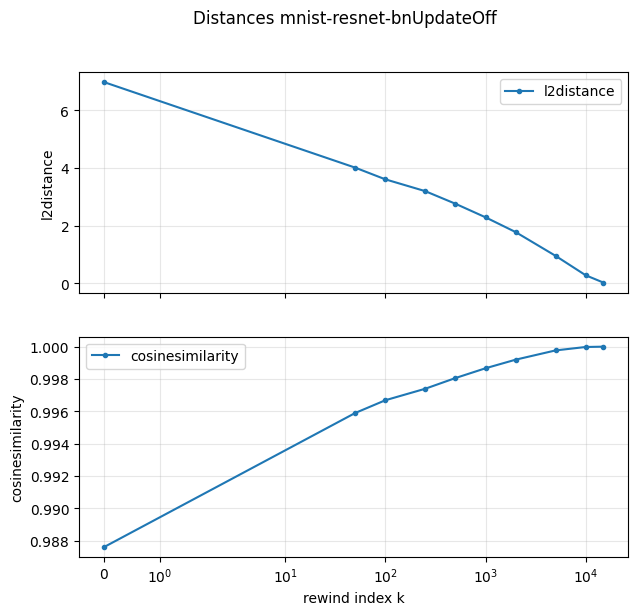

In [13]:
f = plot_distances(distances_df=insta.combined_results_dfs['distances'].loc['default_params'], title=f'Distances {spec}', save_format='png')

## BNupdate ON

In [2]:
spec = 'mnist-resnet-bnUpdateOn'
path = '/system/user/beck/pwbeck/projects/regularization/tflearning/outputs/IA-B-mnist-15.11.0-resnet--230124_164715'
insta = InstabilityAnalyzer.reload(sweep_result_dir=path, instability_folder_suffix='update_bn')

In [3]:
# load training jobs
sweepr = insta.instability_sweep
mainjob = insta.main_training_job

In [4]:
# mainjob.all_log_columns

In [17]:
mainjob.get_summary(log_source='val', col_sel='Accuracy')

,best_train_step,best_val_score,Accuracy-train_step-10000,seed
IA-A-mnist-15.11.0-resnet--230124_163846,10000,0.993667,0.993667,0


In [18]:
sweepr.get_summary()

,best_train_step,best_val_score,trainer.resume_training.checkpoint_idx,seed
IA-B-mnist-15.11.0-resnet--checkpoint_idx-0-seed-1--230124_164741,13500,0.993333,0,1
IA-B-mnist-15.11.0-resnet--checkpoint_idx-100-seed-1--230124_164741,9000,0.993833,100,1
IA-B-mnist-15.11.0-resnet--checkpoint_idx-1000-seed-1--230124_164737,18500,0.993833,1000,1
IA-B-mnist-15.11.0-resnet--checkpoint_idx-10000-seed-1--230124_164732,15000,0.993833,10000,1
IA-B-mnist-15.11.0-resnet--checkpoint_idx-15000-seed-1--230124_165536,24000,0.993333,15000,1
IA-B-mnist-15.11.0-resnet--checkpoint_idx-2000-seed-1--230124_165819,9000,0.994000,2000,1
IA-B-mnist-15.11.0-resnet--checkpoint_idx-250-seed-1--230124_164739,4500,0.993333,250,1
IA-B-mnist-15.11.0-resnet--checkpoint_idx-50-seed-1--230124_164735,16500,0.993167,50,1
IA-B-mnist-15.11.0-resnet--checkpoint_idx-500-seed-1--230124_164740,21000,0.993667,500,1
IA-B-mnist-15.11.0-resnet--checkpoint_idx-5000-seed-1--230124_164729,5500,0.993500,5000,1


In [19]:
# mj_dl = mainjob.get_data_log(['train_step', 'val'])
# f = plot_data_log_values(mj_dl, y_axis_left=['train_step-loss'], y_axis_right=['train_step-Accuracy', 'val-Accuracy'], xlim=(0, 10000), x_axis='train_step', title=f'Training_curves-{spec}', savefig=True)

In [20]:
df = insta.combined_results_dfs['datasets'].loc['default_params']
df

datasets                                                                                                val  \
score                                                                                  interpolation_scores   
alpha                                                                                                  -0.1   
init_model_idx_k job                                             seeds  model_idxes                           
0                IA-B-mnist-15.11.0-resnet--checkpoint_idx-0     (1, 0) (24001, 24001)             0.007504   
50               IA-B-mnist-15.11.0-resnet--checkpoint_idx-50    (1, 0) (24000, 24001)             0.007195   
100              IA-B-mnist-15.11.0-resnet--checkpoint_idx-100   (1, 0) (24000, 24001)             0.006506   
250              IA-B-mnist-15.11.0-resnet--checkpoint_idx-250   (1, 0) (24000, 24001)             0.007670   
500              IA-B-mnist-15.11.0-resnet--checkpoint_idx-500   (1, 0) (24000, 24001)             0.007338   
1000             IA-B-mnist-15.11.0-resnet--checkpoint_idx-1000  (1, 0) (24000, 24001)             0.007171   
2000             IA-B-mnist-15.11.0-resnet--checkpoint_idx-2000  (1, 0) (24000, 24001)             0.006673   
5000             IA-B-mnist-15.11.0-resnet--checkpoint_idx-5000  (1, 0) (24000, 24001)             0.006530   
10000            IA-B-mnist-15.11.0-resnet--checkpoint_idx-10000 (1, 0) (24000, 24001)             0.006340   
15000            IA-B-mnist-15.11.0-resnet--checkpoint_idx-15000 (1, 0) (24000, 24001)             0.007171   

datasets                                                                                          \
score                                                                                              
alpha                                                                                        0.0   
init_model_idx_k job                                             seeds  model_idxes                
0                IA-B-mnist-15.11.0-resnet--checkpoint_idx-0     (1, 0) (24001, 24001)  0.007670   
50               IA-B-mnist-15.11.0-resnet--checkpoint_idx-50    (1, 0) (24000, 24001)  0.007029   
100              IA-B-mnist-15.11.0-resnet--checkpoint_idx-100   (1, 0) (24000, 24001)  0.006673   
250              IA-B-mnist-15.11.0-resnet--checkpoint_idx-250   (1, 0) (24000, 24001)  0.007171   
500              IA-B-mnist-15.11.0-resnet--checkpoint_idx-500   (1, 0) (24000, 24001)  0.007171   
1000             IA-B-mnist-15.11.0-resnet--checkpoint_idx-1000  (1, 0) (24000, 24001)  0.006506   
2000             IA-B-mnist-15.11.0-resnet--checkpoint_idx-2000  (1, 0) (24000, 24001)  0.006506   
5000             IA-B-mnist-15.11.0-resnet--checkpoint_idx-5000  (1, 0) (24000, 24001)  0.006696   
10000            IA-B-mnist-15.11.0-resnet--checkpoint_idx-10000 (1, 0) (24000, 24001)  0.006340   
15000            IA-B-mnist-15.11.0-resnet--checkpoint_idx-15000 (1, 0) (24000, 24001)  0.007171   

datasets                                                                                          \
score                                                                                              
alpha                                                                                        0.1   
init_model_idx_k job                                             seeds  model_idxes                
0                IA-B-mnist-15.11.0-resnet--checkpoint_idx-0     (1, 0) (24001, 24001)  0.007338   
50               IA-B-mnist-15.11.0-resnet--checkpoint_idx-50    (1, 0) (24000, 24001)  0.007361   
100              IA-B-mnist-15.11.0-resnet--checkpoint_idx-100   (1, 0) (24000, 24001)  0.006839   
250              IA-B-mnist-15.11.0-resnet--checkpoint_idx-250   (1, 0) (24000, 24001)  0.007005   
500              IA-B-mnist-15.11.0-resnet--checkpoint_idx-500   (1, 0) (24000, 24001)  0.006839   
1000             IA-B-mnist-15.11.0-resnet--checkpoint_idx-1000  (1, 0) (24000, 24001)  0.006839   
2000             IA-B-mnist-15.11.0-resnet--

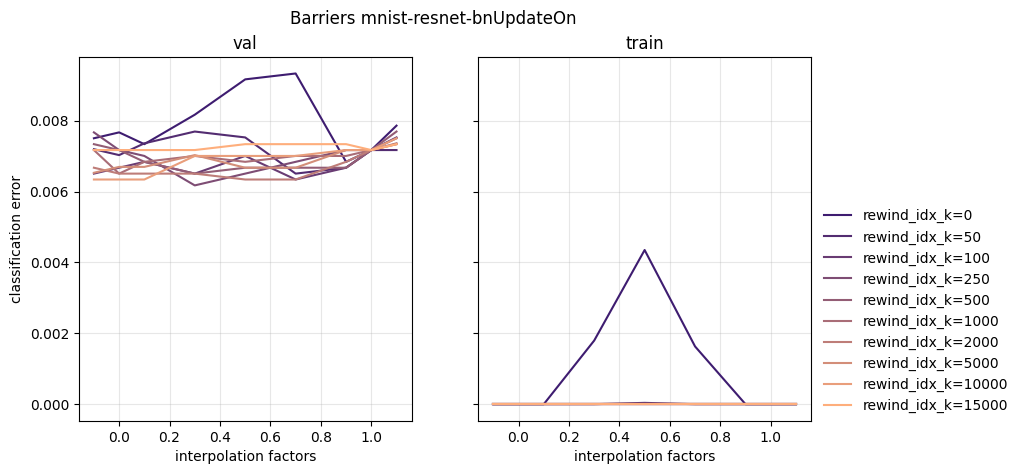

In [25]:
f = plot_barriers(instability_df=insta.combined_results_dfs['datasets'].loc['default_params'], title=f'Barriers {spec}', save_format='png')

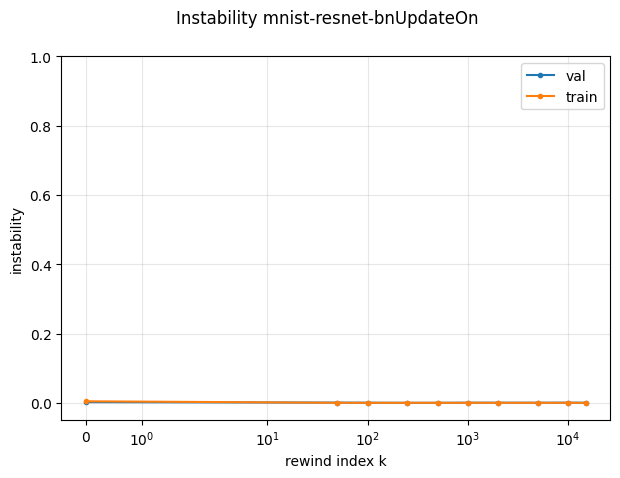

In [22]:
f = plot_instability(instability_df=insta.combined_results_dfs['datasets'].loc['default_params'], title=f'Instability {spec}', x_scale='symlog', save_format='png')

In [4]:
grada = GradCovarianceAnalyzer(job=mainjob, checkpoint_idxs=[], num_batches=[25], batch_sizes=[128], device='cuda:0', save_folder_suffix='', save_to_disk=True)
stats, eigvals = grada.covariance_analysis()

The save folder already exists. Reloading those results. To recompute choose different save_folder_suffix.


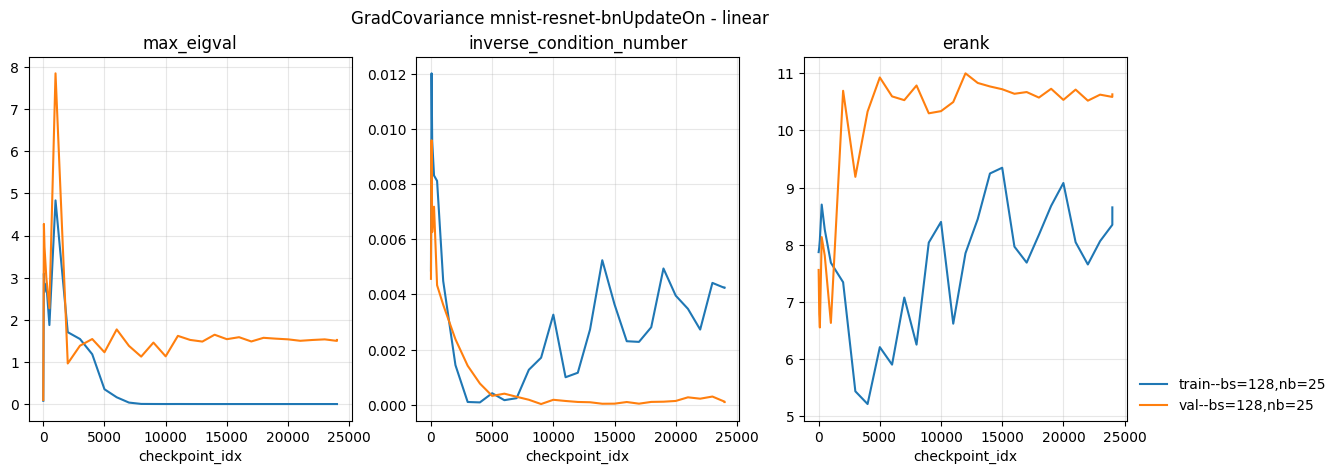

In [6]:
scale = 'linear'
f = plot_covariance_statistics(stats, title=f'GradCovariance {spec} - {scale}', save_format='png', x_scale=scale)

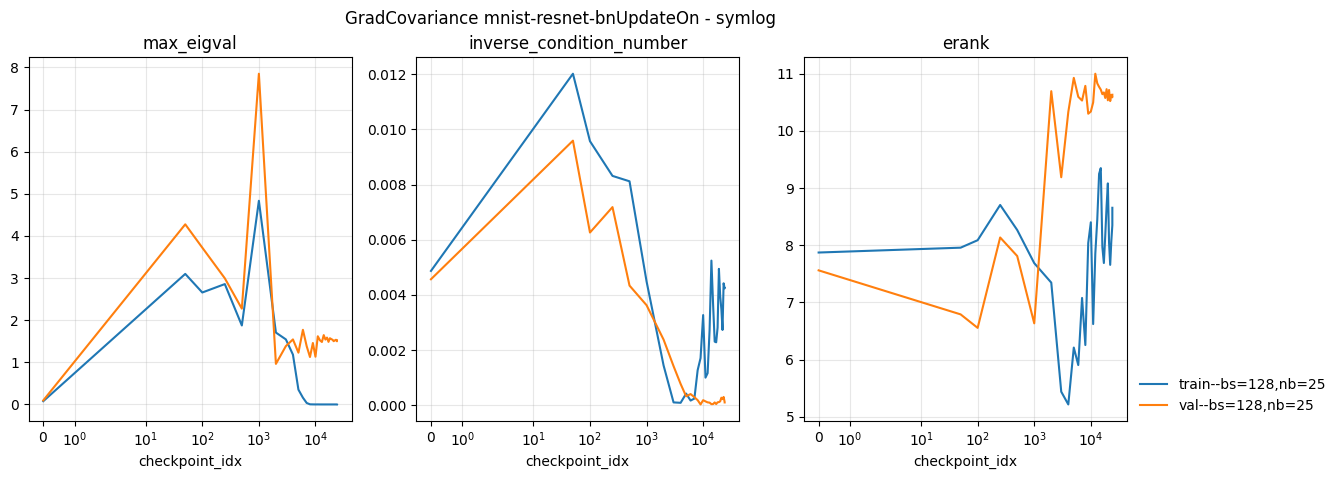

In [7]:
scale = 'symlog'
f = plot_covariance_statistics(stats, title=f'GradCovariance {spec} - {scale}', save_format='png', x_scale=scale)

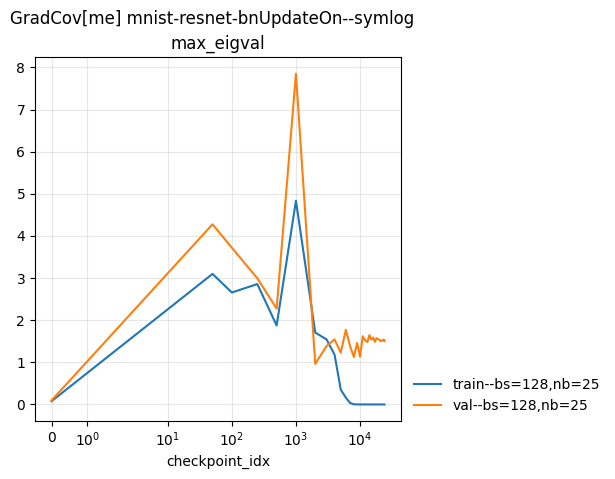

In [5]:
scale = 'symlog'
f = plot_covariance_statistics(stats, title=f'GradCov[me] {spec}--{scale}', save_format='png', x_scale=scale, statistic_names=['max_eigval'], figsize=(1 * 12 * 1 / 2.54, 1.5 * 8 * 1 / 2.54))

In [23]:
df = insta.combined_results_dfs['distances'].loc['default_params']
df

,,,distances,l2distance,cosinesimilarity
init_model_idx_k,job,seeds,model_idxes,,
0,IA-B-mnist-15.11.0-resnet--checkpoint_idx-0,"(1, 0)","(24001, 24001)",6.982973,0.987604
50,IA-B-mnist-15.11.0-resnet--checkpoint_idx-50,"(1, 0)","(24000, 24001)",4.014140,0.995899
100,IA-B-mnist-15.11.0-resnet--checkpoint_idx-100,"(1, 0)","(24000, 24001)",3.608430,0.996687
250,IA-B-mnist-15.11.0-resnet--checkpoint_idx-250,"(1, 0)","(24000, 24001)",3.199008,0.997397
500,IA-B-mnist-15.11.0-resnet--checkpoint_idx-500,"(1, 0)","(24000, 24001)",2.762508,0.998058
1000,IA-B-mnist-15.11.0-resnet--checkpoint_idx-1000,"(1, 0)","(24000, 24001)",2.291223,0.998664
2000,IA-B-mnist-15.11.0-resnet--checkpoint_idx-2000,"(1, 0)","(24000, 24001)",1.778089,0.999196
5000,IA-B-mnist-15.11.0-resnet--checkpoint_idx-5000,"(1, 0)","(24000, 24001)",0.955301,0.999768
10000,IA-B-mnist-15.11.0-resnet--checkpoint_idx-10000,"(1, 0)","(24000, 24001)",0.280321,0.999980


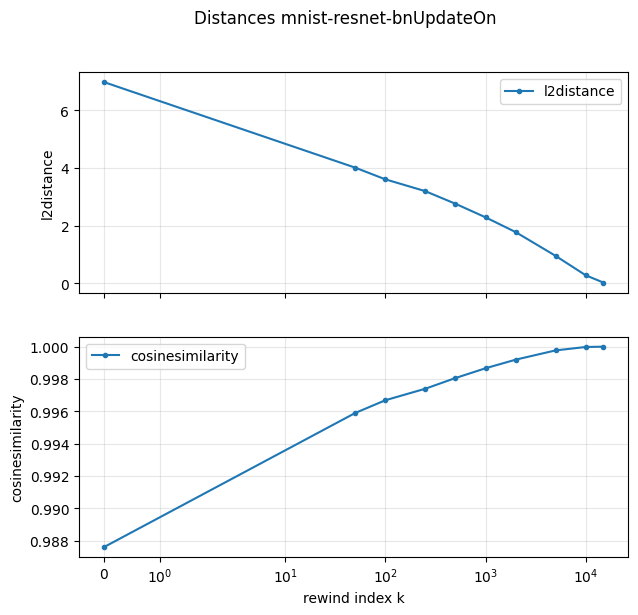

In [24]:
f = plot_distances(distances_df=insta.combined_results_dfs['distances'].loc['default_params'], title=f'Distances {spec}', save_format='png')